## **Mounting our Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = 'drive/My Drive/CivilEL'

Mounted at /content/drive


In [ ]:
import pandas as pd
energy_edited = pd.read_csv(path+'/energy_data.csv') #Includes Total Fossil and Total Hydro
energy = pd.read_csv(path+'/energy_og.csv')
df_weather = pd.read_csv(path+'/weather_features.csv')

In [ ]:
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preprocessing**

ENERGY FILE PREPROCESSING

In [ ]:
energy = energy.drop(['generation fossil coal-derived gas','generation fossil oil shale',
                            'generation fossil peat', 'generation geothermal',
                            'generation hydro pumped storage aggregated', 'generation marine',
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'],
                            axis=1)

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [ ]:
# Convert time to datetime object and set it as index

energy['time'] = pd.to_datetime(energy['time'], utc=True, infer_datetime_format=True)
energy = energy.set_index('time')

In [ ]:
energy.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):

    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

<ipython-input-9-43f52ab40006>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


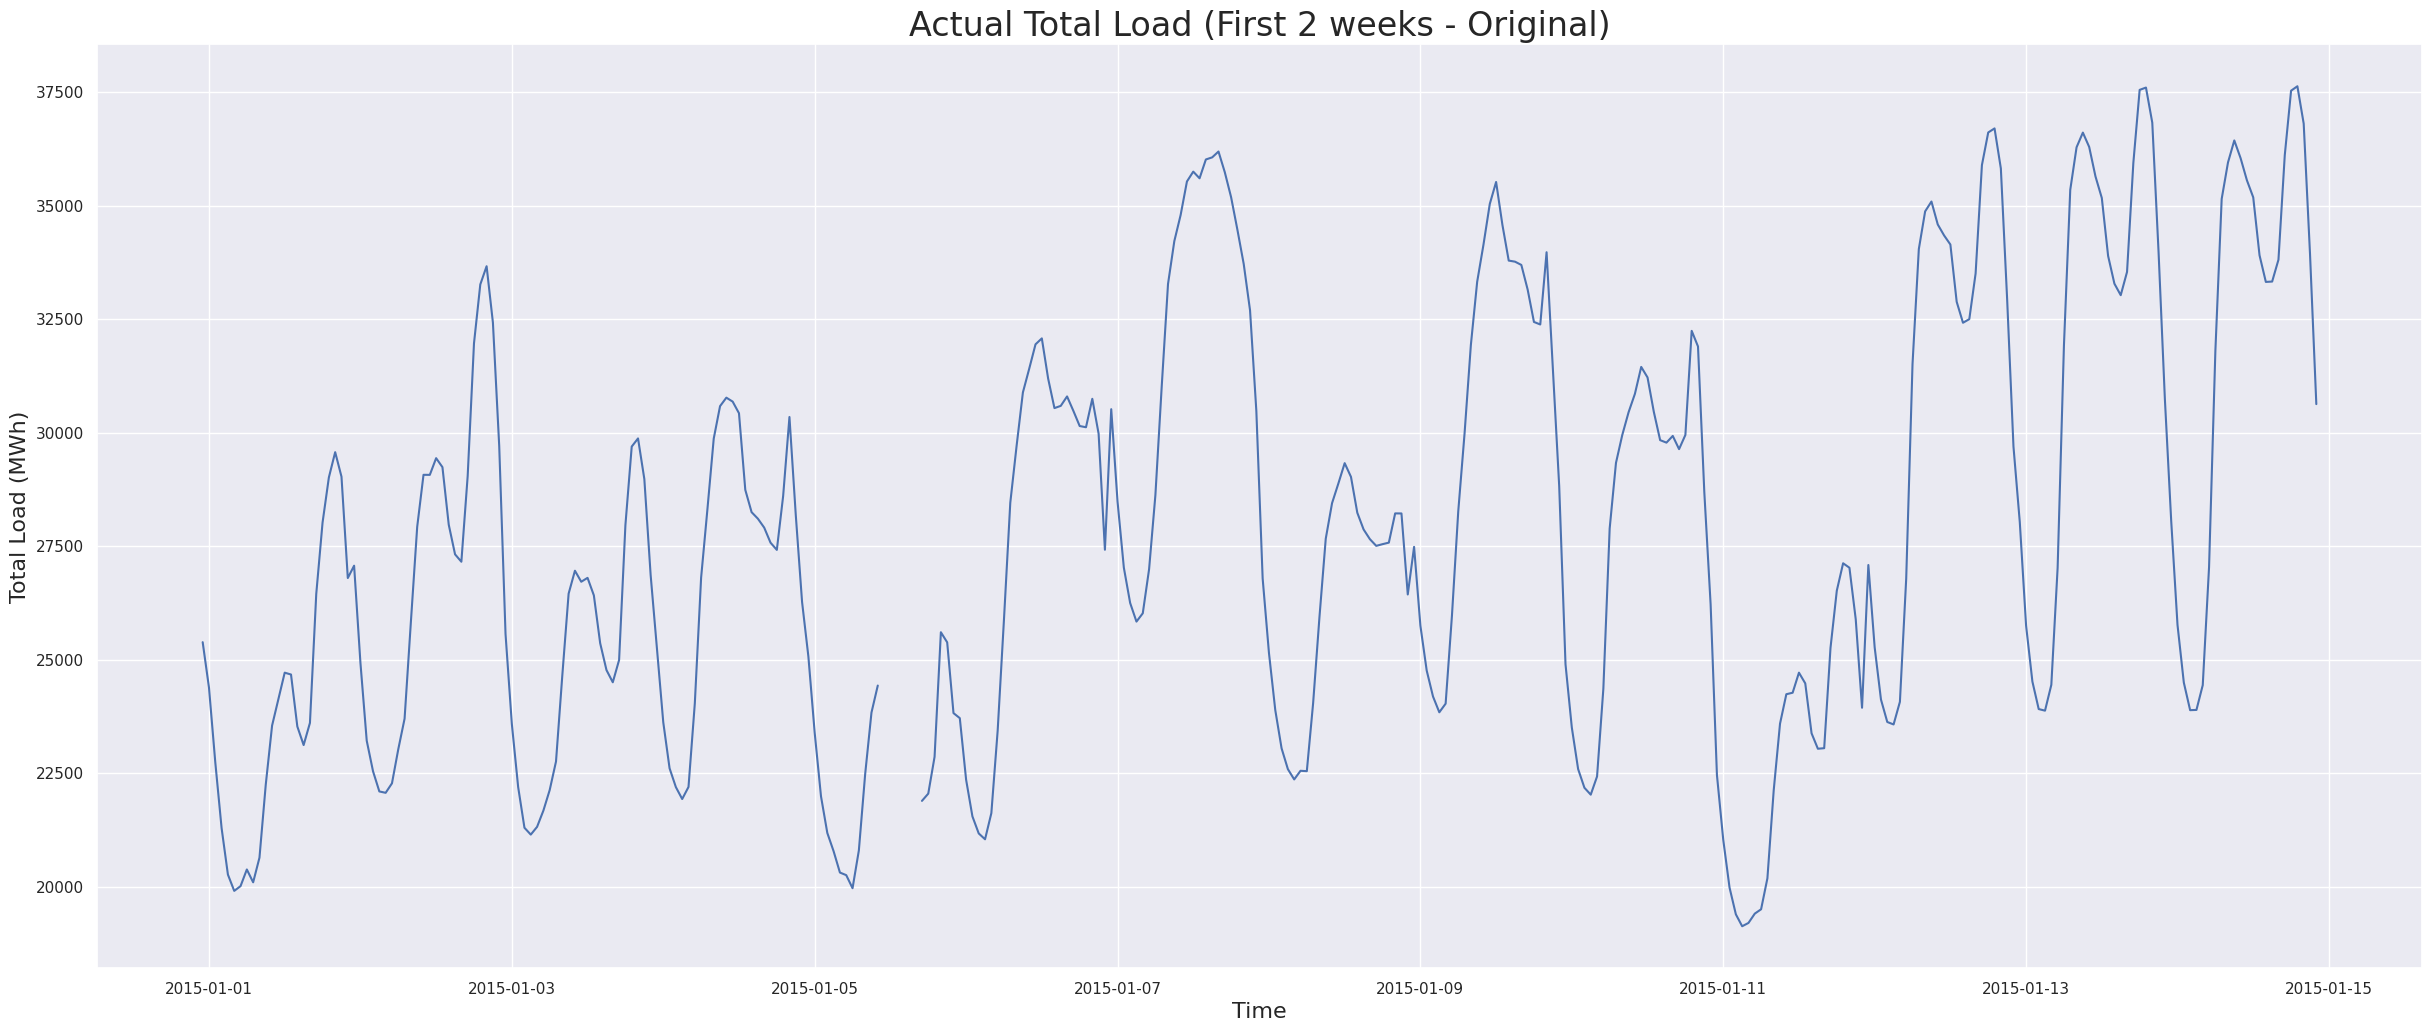

In [ ]:
# Zooming into the plot of the hourly (actual) total load

ax = plot_series(df=energy, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [ ]:
# Filling the null values using interpolation
energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [ ]:
energy.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

WEATHER FILE PREPROCESSING

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [ ]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df
df_weather = df_convert_dtypes(df_weather, np.int64, np.float64)

In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
df_weather = df_weather.drop(['dt_iso'], axis=1)
df_weather = df_weather.set_index('time')

In [ ]:
print('There are {} missing values or NaNs in df_weather.'
      .format(df_weather.isnull().values.sum()))

temp_weather = df_weather.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_weather based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in df_weather.
There are 8622 duplicate rows in df_weather based on all columns.


In [ ]:
print('There are {} observations in df_energy.'.format(energy.shape[0]))

cities = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]),
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia.
There are 36267 observations in df_weather about city: Madrid.
There are 35951 observations in df_weather about city: Bilbao.
There are 35476 observations in df_weather about city:  Barcelona.
There are 35557 observations in df_weather about city: Seville.


In [ ]:
df_weather_2 = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                        keep='last').set_index('time')

df_weather = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

In [ ]:
print('There are {} observations in df_energy.'.format(energy.shape[0]))

cities = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]),
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35064 observations in df_weather about city: Valencia.
There are 35064 observations in df_weather about city: Madrid.
There are 35064 observations in df_weather about city: Bilbao.
There are 35064 observations in df_weather about city:  Barcelona.
There are 35064 observations in df_weather about city: Seville.


In [ ]:
weather_description_unique = df_weather['weather_description'].unique()
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

In [ ]:
df_weather = df_weather.drop(['weather_main', 'weather_id',
                              'weather_description', 'weather_icon'], axis=1)

In [ ]:
df_weather_cols = df_weather.columns.drop('city_name')

## **Merging the two datasets**

In [ ]:
df_1, df_2, df_3, df_4, df_5 = [x for _, x in df_weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [ ]:
df_final = energy

for dff in dfs:
    city = dff['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    dff = dff.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(dff, on=['time'], how='outer')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)

df_final.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'rain_3h_Barcelona', 'snow_3h_Barcelona',
       'clouds_all_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'rain_3h_Bilbao', 'snow_3h_Bilbao', 'clo

In [ ]:
print('There are {} missing values or NaNs in df_final.'
      .format(df_final.isnull().values.sum()))

temp_final = df_final.duplicated(keep='first').sum()

print('\nThere are {} duplicate rows in df_energy based on all columns.'
      .format(temp_final))

There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 72 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

In [ ]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for city in cities:
    df_final = df_final.drop(['rain_3h_{}'.format(city)], axis=1)

In [ ]:
df = df_final
df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,285.640,285.150,286.150,1028.0,62.0,2.0,140.0,0.0,0.0,0.0
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,283.140,282.150,284.150,1029.0,71.0,1.0,242.0,0.0,0.0,0.0
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,281.660,281.150,282.150,1029.0,81.0,3.0,300.0,0.0,0.0,0.0


In [ ]:
energy_graph_distribution = energy.drop(['total load actual','price day ahead','price actual'], axis=1)
energy_graph_distribution.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

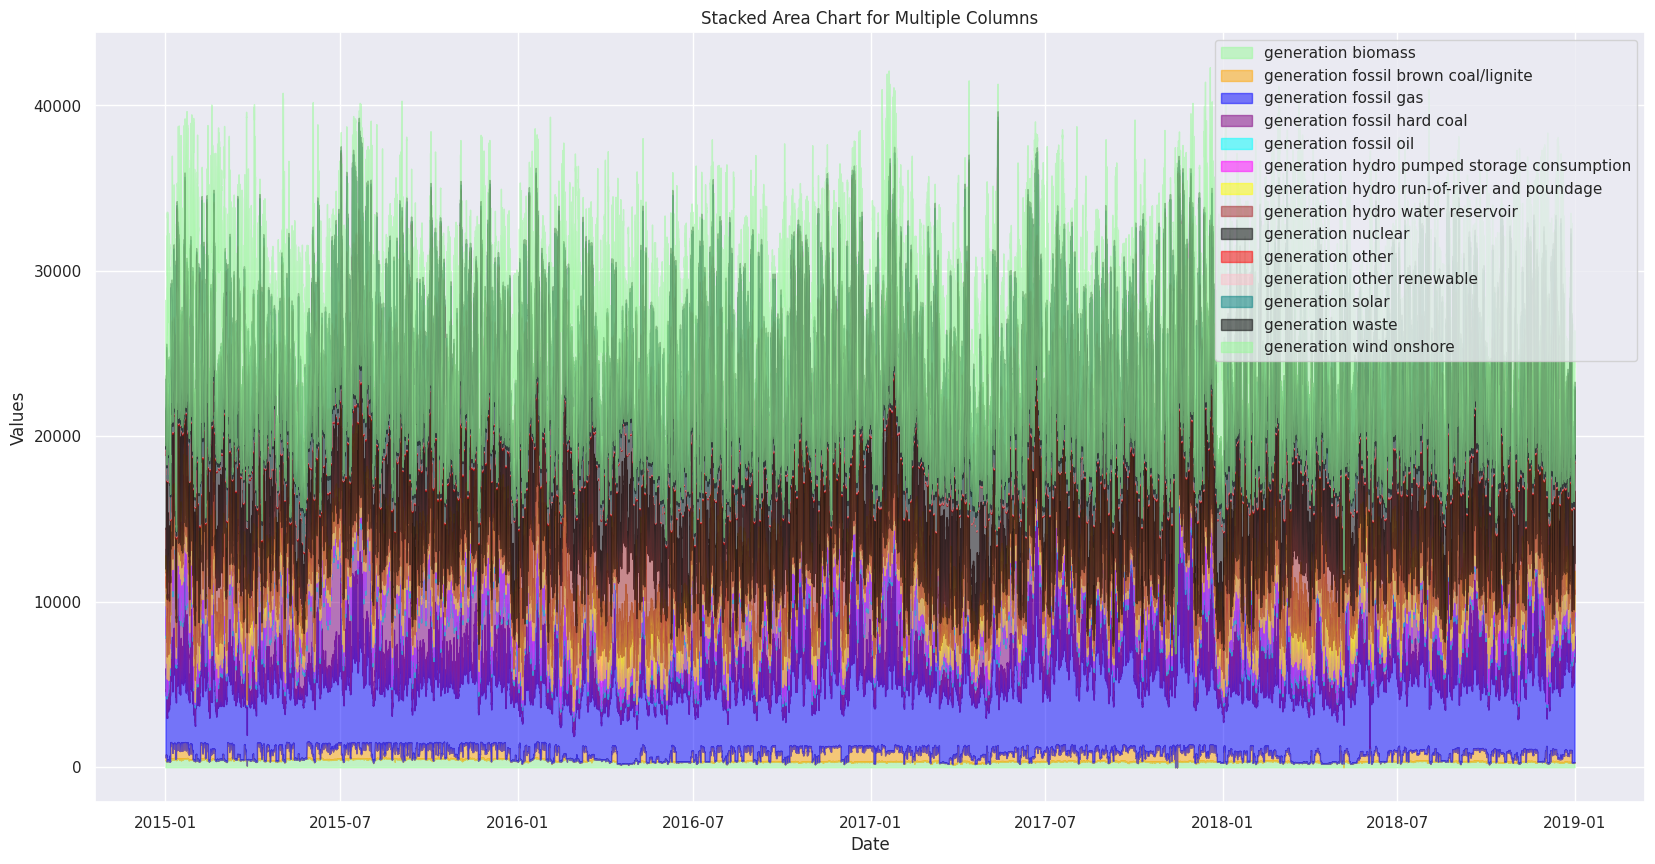

In [ ]:
colors = [
     'palegreen', 'orange', 'blue', 'purple', 'cyan', 'magenta', 'yellow',
    'brown', 'black', 'red', 'pink', 'teal','black'
]

plt.figure(figsize=(20, 10))

# Initialize a baseline series with zeros
baseline = pd.Series(0, index=energy_graph_distribution.index)

for i, column in enumerate(energy_graph_distribution.columns):
    plt.fill_between(energy_graph_distribution.index, baseline, baseline + energy_graph_distribution[column], label=column, alpha=0.5, color=colors[i % len(colors)])
    baseline += energy_graph_distribution[column]

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stacked Area Chart for Multiple Columns')
plt.legend()
plt.grid(True)
plt.show()

From Online sources: Statista

---


wind: 25.5%

nuclear: 20.34%

solar: 14%

hydro: 17.4%

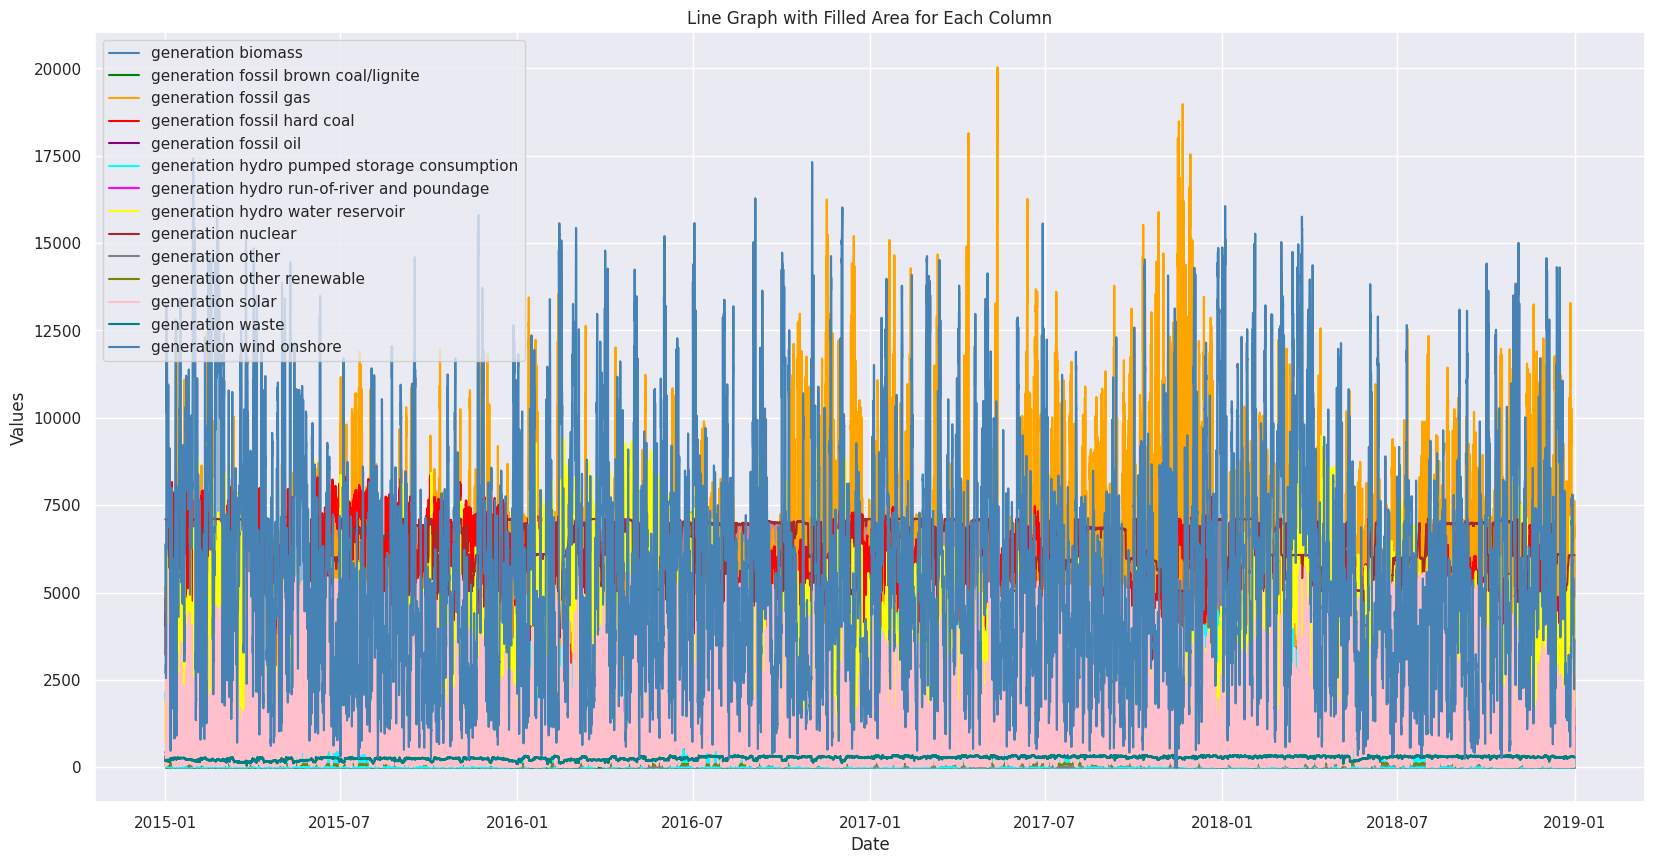

In [ ]:

colors = [
    'steelblue', 'green', 'orange', 'red', 'purple', 'cyan', 'magenta', 'yellow',
    'brown', 'gray', 'olive', 'pink', 'teal'
]

# Plotting line graph with filled area under each line for multiple columns
plt.figure(figsize=(20, 10))

for i, column in enumerate(energy_graph_distribution.columns):
    plt.plot(energy_graph_distribution.index, energy_graph_distribution[column], label=column, color=colors[i % len(colors)])
    plt.fill_between(energy_graph_distribution.index, energy_graph_distribution[column], color=colors[i % len(colors)], alpha=0.5, interpolate=True)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Line Graph with Filled Area for Each Column')
plt.legend()
plt.grid(True)
plt.show()


summer in spain: june to september

winter in spain: december to march

# **MODEL BUILDING AND EVALUATION**

In [ ]:
X = df_final.drop(['price actual','price day ahead'],axis=1)
y = df_final['price actual']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(pred,y_test)))

5.126351572432327


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print(np.sqrt(mean_squared_error(pred,y_test)))

8.18395008444838


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train,y_train)
pred = et.predict(X_test)
print(np.sqrt(mean_squared_error(pred,y_test)))

4.500554133184136


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_reg.fit(X_train, y_train)

y_pred_gb = gb_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred_gb,y_test)))

8.405932612679267


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define a simplified parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [5000],
    'max_depth': [5],
    'learning_rate': [0.16],
    'subsample': [1]
}

# Define the scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_reg = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define a simplified parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [ 200,300,500],
    'max_depth': [5,8],
    'learning_rate': [0.2,0.3],
    'subsample': [0.8, 1.0]
}

# Define the scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_reg = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")

KeyboardInterrupt: 

In [ ]:
et_reg = ExtraTreesRegressor(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=et_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_et_reg = ExtraTreesRegressor(**best_params, random_state=42, n_jobs=-1)
best_et_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_et_reg.predict(X_test)

# Calculate RMSE and other metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")